In [1]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
'''constants'''
x_offset = [0,0,0,0,0,0]
y_offset = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
z_offset = [-250.9, -102.0, -192.7, -418.6, -102.0, 253.7]
r_offset = [346.9, 662.1, 342.3, 366.9, 221.7, 362.3]
R = [319.3, 0.0, 345.2, -154.4, 0.0, 29.4]
x1,z1 = -100, -600 ##top left
x2,z2 = 790, 225  ##bottom right
y1, y2 = -500, 1200
angleA, angleB = 45, 135
resolution = 10

In [3]:
'''function'''
class torus_function:
    def __init__(self,x_offset, y_offset, z_offset, r_offset, R):
        self.x_offset = x_offset
        self.y_offset = y_offset
        self.z_offset = z_offset
        self.r_offset = r_offset
        self.R = R
    def check_inside_torus(self, x, y, z):
        return (np.sqrt((x-self.x_offset)**2+(y-self.y_offset)**2)-self.R)**2 + (z-self.z_offset)**2 <= self.r_offset**2
    def check_outside_torus(self, x, y, z):
        return (np.sqrt((x-self.x_offset)**2+(y-self.y_offset)**2)-self.R)**2 + (z-self.z_offset)**2 > self.r_offset**2
    def vec_check_inside_torus(self, x, y, z):
        vfunc = np.vectorize(self.check_inside_torus)
        return vfunc(x,y,z)
    def vec_check_outside_torus(self, x, y, z):
        vfunc = np.vectorize(self.check_outside_torus)
        return vfunc(x,y,z)
class circle_function:
    def __init__(self,x_offset, y_offset, z_offset, r_offset, R):
        self.x_offset = x_offset
        self.z_offset = z_offset
        self.r_offset = r_offset
    def check_inside_circle(self, x, y, z):
        return (self.x_offset-x)**2 + (self.z_offset - z)**2 <= self.r_offset ** 2
    def check_outside_circle(self,x, y, z):
        return (self.x_offset-x)**2 + (self.z_offset - z)**2 > self.r_offset ** 2
class angle_function:
    def __init__(self, left_angle, right_angle):
        self.left_angle = left_angle
        self.right_angle = right_angle
    def check_inside_angle(self, x, y, z):
        angle = np.arctan2(x, y) * 180 / np.pi
        # return angle < self.left_angle and angle > self.right_angle
        return np.logical_and(angle > self.left_angle, angle < self.right_angle)
    def vec_check_inside_angle(self, x,y,z):
        vfunc = np.vectorize(self.check_inside_angle)
        return vfunc(x,y,z)

In [4]:
in_torus, in_circle = [], []
out_torus, out_circle = [], []
for i in range(3):
    in_torus.append(torus_function(x_offset[i], y_offset[i], z_offset[i], r_offset[i], R[i]))
    in_circle.append(circle_function(x_offset[i], y_offset[i], z_offset[i], r_offset[i], R[i]))
for i in range(3,6):
    out_torus.append(torus_function(x_offset[i], y_offset[i], z_offset[i], r_offset[i], R[i]))
    out_circle.append(circle_function(x_offset[i], y_offset[i], z_offset[i], r_offset[i], R[i]))
angle_range = angle_function(angleA, angleB)

In [5]:
'''Workspace testing point'''
x = np.arange(x1, x2, resolution)
y = np.arange(y1, y2, resolution)
z = np.arange(z1, z2, resolution)
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

In [6]:
''' find points '''
def check_in_range(X,Y,Z):
    len_x, len_y, len_z = X.shape[0], X.shape[1], X.shape[2]
    output = np.ones((len_x, len_y, len_z),  dtype=bool) 
    for torus in in_torus:
        output = np.logical_and(output, torus.check_inside_torus(X,Y,Z))
    for torus in out_torus:
        output = np.logical_and(output, torus.check_outside_torus(X,Y,Z))
    output = np.logical_and(output, angle_range.check_inside_angle(X,Y,Z))
    return output 
point_find = check_in_range(x_grid, y_grid, z_grid)
points_workspace = np.hstack([x_grid[point_find==True].reshape((-1,1)),y_grid[point_find==True].reshape((-1,1)),z_grid[point_find==True].reshape((-1,1))])
points_workspace = points_workspace.reshape((-1,3))
points_workspace.shape

(142564, 3)

Text(0.5, 1.0, 'X vs. Y')

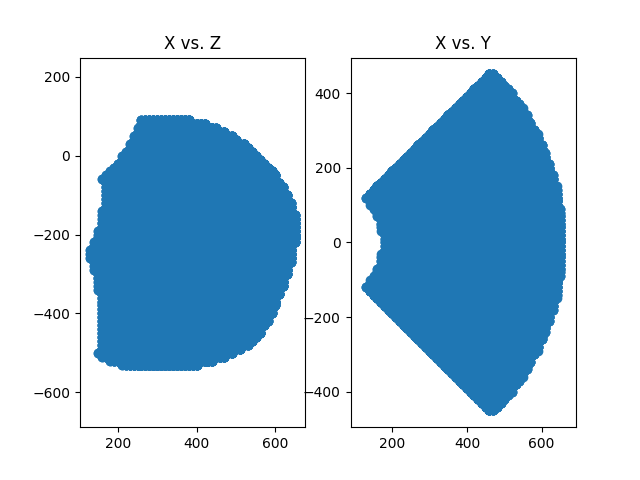

In [7]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.scatter(x_grid[point_find==True], y_grid[point_find==True], z_grid[point_find==True])
ax.set_title('3d Scatter plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
f, (ax1, ax2) = plt.subplots(1, 2)
y_0 = y_grid == 0.0
mask = np.logical_and(point_find==True, y_0)
mask = point_find == True
ax1.scatter(x_grid[mask], z_grid[mask])
ax1.axis('equal')
ax1.set_title('X vs. Z')
ax2.scatter(x_grid[mask], y_grid[mask])
ax2.axis('equal')
ax2.set_title('X vs. Y')

In [8]:
x_grid[point_find==True].shape

(142564,)

In [9]:
'''save to csv '''
np.savetxt("points_workspace.csv", points_workspace, delimiter=",")